# EMISSION MAPPING FOR MULTISPECIES OF ATMOSPHERIC POLLUTANTS OVER THE CONUS

It is important to track emission of harmful gaseous and particulate matter such as NOX, SO2, CO, NH3 and PM2.5 as these pollutants, including greenhouse gasses, are significant climate forcers. The data I am using for my project represents the point source emissions collected from different inventories over the CONUS and aggregated to extract the final annually averaged emission for the entire CONUS.My CLIM680 project will explore the emission pattern for different species of atmospheric pollutants basically to see how the emission varies spatially within the CONUS. This project will analyze annual total emissions for  NOx, PM2.5,CO, and NH3 measured in terms of ton/km2/yr.



In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import xesmf as xe

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import pandas as pd

### DATASET
The name of the dataset I am using is Neighborhood Emission Mapping Operation (NEMO)(http://air.csiss.gmu.edu/). This data contains annual total emission of VOCs, NOx, PM2.5, SO2, CO, and NH3 by sector in NetCDF format. These are the anthropogenic emissions from the National Emissions Inventory. The unit is ton/km2/yr. The base year I have used in this analysis is 2017. It is collected in 1 km resolution grid and the temporal resolution I am using here is monthly i.e every month has one averaged vaue of emission.The source sector of these emissions are anthropogenic fugitive dust (afdust), agriculture (ag),nonpoint (nonpt), oil and gas operations (np_oilgas), onroad, nonroad, rail, residential wood combustion (rwc), and airports.


In [2]:
path = '/groups/ESS3/qtong/data/nemo2017/'
fname = 'emis_mole_all_2017ann_US01_cmaq_cb6ae7_2017gb_17j_nosoaalk.ncf'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:  (TSTEP: 1, VAR: 9, DATE-TIME: 2, LAY: 1, ROW: 3177, COL: 5397)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables:
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 ...
    VOCANN   (TSTEP, LAY, ROW, COL) float32 ...
    NOXANN   (TSTEP, LAY, ROW, COL) float32 ...
    COANN    (TSTEP, LAY, ROW, COL) float32 ...
    SO2ANN   (TSTEP, LAY, ROW, COL) float32 ...
    NH3ANN   (TSTEP, LAY, ROW, COL) float32 ...
    PM25ANN  (TSTEP, LAY, ROW, COL) float32 ...
    PECANN   (TSTEP, LAY, ROW, COL) float32 ...
    POCANN   (TSTEP, LAY, ROW, COL) float32 ...
    PMCANN   (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.2: $Id: init3.F90 185 2020-08-28 16:49:45Z coats ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2022097
    CTIME:          190659
    WDATE:          2022097
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          US01            
    UPNAM:          ANNUAL_EMIS     
    VAR-LIST:       VOCANN          NOXANN          COANN           SO2ANN   ...
    FILEDESC:       Merged emissions output file from Mrggrid                ...
    HISTORY:

In [3]:
path = '/home/aachar5/'
fname = 'GRID_LATLON_CENTRAL_US01.ncf'
ds_GRID = xr.open_dataset(path+fname)
ds_GRID

<xarray.Dataset>
Dimensions:  (TSTEP: 1, VAR: 2, DATE-TIME: 2, LAY: 1, ROW: 3177, COL: 5397)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables:
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 ...
    LAT      (TSTEP, LAY, ROW, COL) float32 ...
    LON      (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.2: $Id: init3.F90 185 2020-08-28 16:49:45Z coats ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2022230
    CTIME:          160047
    WDATE:          2022230
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          US01            
    UPNAM:          OUTFILE         
    VAR-LIST:       LAT             LON             
    FILEDESC:       
    HISTORY:

### PROPOSED ANALYSIS
My dataset was in an irregular grid with 3177 values of Row and 5397 values of column for the corresponding latitudes and longitudes. So i regridded my data set at first. 


In [4]:
ds_GRID['TFLAG'][0,0,:].max()

<xarray.DataArray 'TFLAG' ()>
array(2017001, dtype=int32)

In [5]:
lats = ds_GRID['LAT'][0,0,:,:]
lons = ds_GRID['LON'][0,0,:,:]

In [6]:
new_ds1 = ds.assign_coords({'lat':lats})
new_ds2 = new_ds1.assign_coords({'lon':lons})
new_ds2

<xarray.Dataset>
Dimensions:  (TSTEP: 1, VAR: 9, DATE-TIME: 2, LAY: 1, ROW: 3177, COL: 5397)
Coordinates:
    lat      (ROW, COL) float32 ...
    lon      (ROW, COL) float32 ...
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables:
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 2017001 0 2017001 0 ... 0 2017001 0
    VOCANN   (TSTEP, LAY, ROW, COL) float32 ...
    NOXANN   (TSTEP, LAY, ROW, COL) float32 ...
    COANN    (TSTEP, LAY, ROW, COL) float32 ...
    SO2ANN   (TSTEP, LAY, ROW, COL) float32 ...
    NH3ANN   (TSTEP, LAY, ROW, COL) float32 ...
    PM25ANN  (TSTEP, LAY, ROW, COL) float32 ...
    PECANN   (TSTEP, LAY, ROW, COL) float32 ...
    POCANN   (TSTEP, LAY, ROW, COL) float32 ...
    PMCANN   (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.2: $Id: init3.F90 185 2020-08-28 16:49:45Z coats ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2022097
    CTIME:          190659
    WDATE:          2022097
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          US01            
    UPNAM:          ANNUAL_EMIS     
    VAR-LIST:       VOCANN          NOXANN          COANN           SO2ANN   ...
    FILEDESC:       Merged emissions output file from Mrggrid                ...
    HISTORY:

In [7]:
new_lat = np.arange(25,50,0.1)
new_lon = np.arange(-120,-65,0.5)

ds_out = xr.Dataset({'lat':(['lat'],new_lat),
                     'lon':(['lon'],new_lon)
                    })
ds_out

<xarray.Dataset>
Dimensions:  (lat: 250, lon: 110)
Coordinates:
  * lat      (lat) float64 25.0 25.1 25.2 25.3 25.4 ... 49.5 49.6 49.7 49.8 49.9
  * lon      (lon) float64 -120.0 -119.5 -119.0 -118.5 ... -66.5 -66.0 -65.5
Data variables:
    *empty*

In [8]:
var = 'NH3ANN'
regridder = xe.Regridder(new_ds2,ds_out,'bilinear')
dr_out = regridder(ds[var][0,0,:,:]).to_dataset(name=var)
dr_out.reset_coords()
dr_out

<xarray.Dataset>
Dimensions:  (lat: 250, lon: 110)
Coordinates:
  * lat      (lat) float64 25.0 25.1 25.2 25.3 25.4 ... 49.5 49.6 49.7 49.8 49.9
  * lon      (lon) float64 -120.0 -119.5 -119.0 -118.5 ... -66.5 -66.0 -65.5
Data variables:
    NH3ANN   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [9]:
dr_out['NH3ANN'].max()

<xarray.DataArray 'NH3ANN' ()>
array(27.4057827)

/home/aachar5/.conda/envs/new_clim_data/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


''

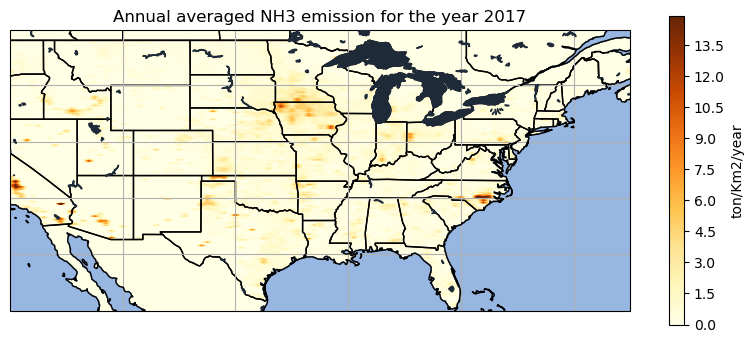

In [10]:
# Make the figure larger
fig = plt.figure(figsize=(10,10))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())


# Add cyclic point to data
data=dr_out['NH3ANN']
data, lons = add_cyclic_point(data, coord=dr_out['lon'])

# Make a filled contour plot
clevs = np.arange(0,15,0.1)
cs=ax.contourf(lons, dr_out['lat'],data,clevs,
            transform = ccrs.PlateCarree(),cmap ='YlOrBr')

# Mask out continents
ax.add_feature(feature.OCEAN, zorder=2, facecolor=cfeature.COLORS['water'])
ax.add_feature(feature.BORDERS, zorder=2, color='k')
ax.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
ax.coastlines(zorder=3, color='k')

# Add coastlines
ax.coastlines()
ax.add_feature(cfeature.STATES.with_scale("50m"))
ax.gridlines()

# Define the xticks for longitude
#ax.set_xticks(np.arange(-120,-65,5), crs=ccrs.PlateCarree())
#lon_formatter = cticker.LongitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
#ax.set_yticks(np.arange(25,50,5), crs=ccrs.PlateCarree())
#lat_formatter = cticker.LatitudeFormatter()
#ax.yaxis.set_major_formatter(lat_formatter) 
;
cbar = plt.colorbar(cs,shrink=0.4,orientation='vertical',label='ton/Km2/year')
plt.title('Annual averaged NH3 emission for the year 2017')
plt.savefig("NH3Ann2")
;

In [11]:
var = 'COANN'
regridder = xe.Regridder(new_ds2,ds_out,'bilinear')
dr_out = regridder(ds[var][0,0,:,:]).to_dataset(name=var)
dr_out.reset_coords()
dr_out

<xarray.Dataset>
Dimensions:  (lat: 250, lon: 110)
Coordinates:
  * lat      (lat) float64 25.0 25.1 25.2 25.3 25.4 ... 49.5 49.6 49.7 49.8 49.9
  * lon      (lon) float64 -120.0 -119.5 -119.0 -118.5 ... -66.5 -66.0 -65.5
Data variables:
    COANN    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [12]:
dr_out['COANN'].max()

<xarray.DataArray 'COANN' ()>
array(514.59674072)

/home/aachar5/.conda/envs/new_clim_data/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


''

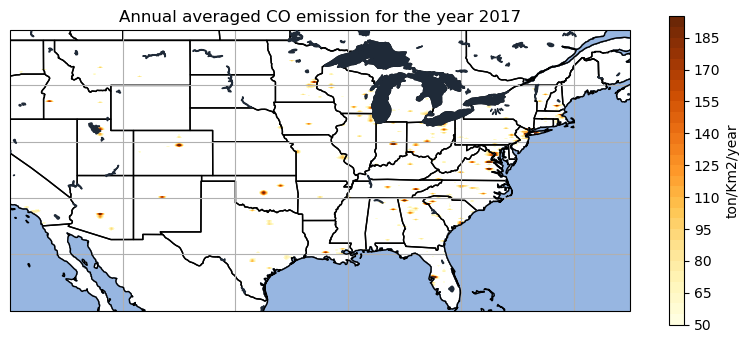

In [13]:
# Make the figure larger
fig = plt.figure(figsize=(10,10))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())


# Add cyclic point to data
data=dr_out['COANN']
data, lons = add_cyclic_point(data, coord=dr_out['lon'])

# Make a filled contour plot
clevs = np.arange(50,200,5)
cs=ax.contourf(lons, dr_out['lat'],data,clevs,
            transform = ccrs.PlateCarree(),cmap ='YlOrBr')

# Mask out continents
ax.add_feature(feature.OCEAN, zorder=2, facecolor=cfeature.COLORS['water'])
ax.add_feature(feature.BORDERS, zorder=2, color='k')
ax.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
ax.coastlines(zorder=3, color='k')

# Add coastlines
ax.coastlines()
ax.add_feature(cfeature.STATES.with_scale("50m"))
ax.gridlines()

# Define the xticks for longitude
#ax.set_xticks(np.arange(-120,-65,5), crs=ccrs.PlateCarree())
#lon_formatter = cticker.LongitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
#ax.set_yticks(np.arange(25,50,5), crs=ccrs.PlateCarree())
#lat_formatter = cticker.LatitudeFormatter()
#ax.yaxis.set_major_formatter(lat_formatter) 
;
cbar = plt.colorbar(cs,shrink=0.4,orientation='vertical',label='ton/Km2/year')
plt.title('Annual averaged CO emission for the year 2017')
plt.savefig("b1")
;

''

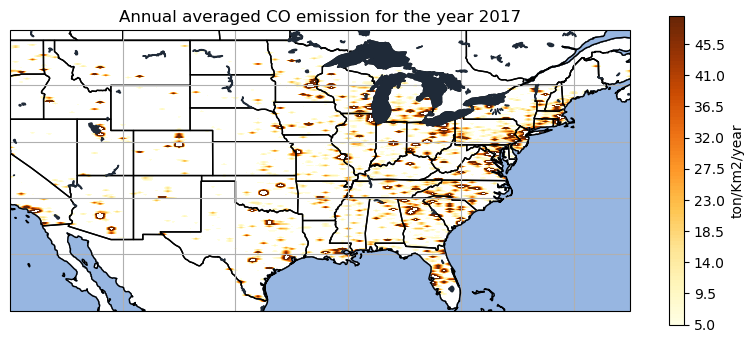

In [14]:
# Make the figure larger
fig = plt.figure(figsize=(10,10))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())


# Add cyclic point to data
data=dr_out['COANN']
data, lons = add_cyclic_point(data, coord=dr_out['lon'])

# Make a filled contour plot
clevs = np.arange(5,50,0.5)
cs=ax.contourf(lons, dr_out['lat'],data,clevs,
            transform = ccrs.PlateCarree(),cmap ='YlOrBr')

# Mask out continents
ax.add_feature(feature.OCEAN, zorder=2, facecolor=cfeature.COLORS['water'])
ax.add_feature(feature.BORDERS, zorder=2, color='k')
ax.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
ax.coastlines(zorder=3, color='k')

# Add coastlines
ax.coastlines()
ax.add_feature(cfeature.STATES.with_scale("50m"))
ax.gridlines()

# Define the xticks for longitude
#ax.set_xticks(np.arange(-120,-65,5), crs=ccrs.PlateCarree())
#lon_formatter = cticker.LongitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
#ax.set_yticks(np.arange(25,50,5), crs=ccrs.PlateCarree())
#lat_formatter = cticker.LatitudeFormatter()
#ax.yaxis.set_major_formatter(lat_formatter) 
;
cbar = plt.colorbar(cs,shrink=0.4,orientation='vertical',label='ton/Km2/year')
plt.title('Annual averaged CO emission for the year 2017')
plt.savefig("b2")
;

In [15]:
var = 'NOXANN'
regridder = xe.Regridder(new_ds2,ds_out,'bilinear')
dr_out = regridder(ds[var][0,0,:,:]).to_dataset(name=var)
dr_out.reset_coords()
dr_out

<xarray.Dataset>
Dimensions:  (lat: 250, lon: 110)
Coordinates:
  * lat      (lat) float64 25.0 25.1 25.2 25.3 25.4 ... 49.5 49.6 49.7 49.8 49.9
  * lon      (lon) float64 -120.0 -119.5 -119.0 -118.5 ... -66.5 -66.0 -65.5
Data variables:
    NOXANN   (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

''

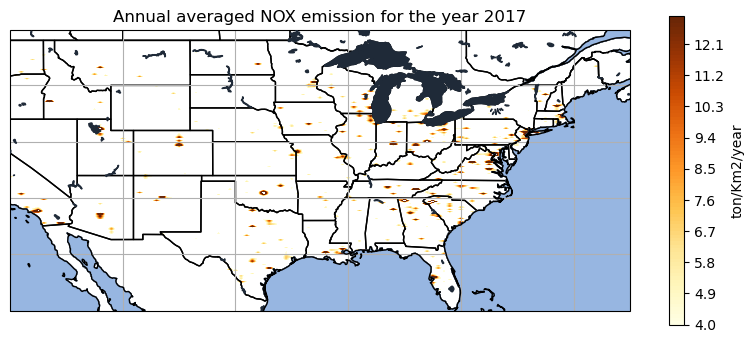

In [16]:
# Make the figure larger
fig = plt.figure(figsize=(10,10))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())


# Add cyclic point to data
data=dr_out['NOXANN']
data, lons = add_cyclic_point(data, coord=dr_out['lon'])

# Make a filled contour plot
clevs = np.arange(4,13,0.1)
cs=ax.contourf(lons, dr_out['lat'],data,clevs,
            transform = ccrs.PlateCarree(),cmap ='YlOrBr')

# Mask out continents
ax.add_feature(feature.OCEAN, zorder=2, facecolor=cfeature.COLORS['water'])
ax.add_feature(feature.BORDERS, zorder=2, color='k')
ax.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
ax.coastlines(zorder=3, color='k')

# Add coastlines
ax.coastlines()
ax.add_feature(cfeature.STATES.with_scale("50m"))
ax.gridlines()

# Define the xticks for longitude
#ax.set_xticks(np.arange(-120,-65,5), crs=ccrs.PlateCarree())
#lon_formatter = cticker.LongitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
#ax.set_yticks(np.arange(25,50,5), crs=ccrs.PlateCarree())
#lat_formatter = cticker.LatitudeFormatter()
#ax.yaxis.set_major_formatter(lat_formatter) 
;
cbar = plt.colorbar(cs,shrink=0.4,orientation='vertical',label='ton/Km2/year')
plt.title('Annual averaged NOX emission for the year 2017')
plt.savefig("NoxAnn1")
;

''

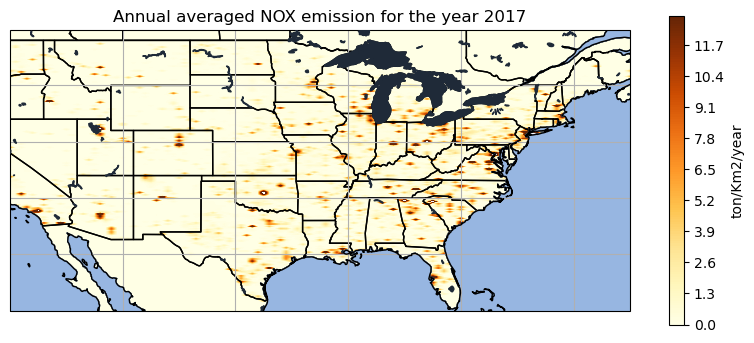

In [29]:
# Make the figure larger
fig = plt.figure(figsize=(10,10))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())


# Add cyclic point to data
data=dr_out['NOXANN']
data, lons = add_cyclic_point(data, coord=dr_out['lon'])

# Make a filled contour plot
clevs = np.arange(0,13,0.1)
cs=ax.contourf(lons, dr_out['lat'],data,clevs,
            transform = ccrs.PlateCarree(),cmap ='YlOrBr')

# Mask out continents
ax.add_feature(feature.OCEAN, zorder=2, facecolor=cfeature.COLORS['water'])
ax.add_feature(feature.BORDERS, zorder=2, color='k')
ax.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
ax.coastlines(zorder=3, color='k')

# Add coastlines
ax.coastlines()
ax.add_feature(cfeature.STATES.with_scale("50m"))
ax.gridlines()

# Define the xticks for longitude
#ax.set_xticks(np.arange(-120,-65,5), crs=ccrs.PlateCarree())
#lon_formatter = cticker.LongitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
#ax.set_yticks(np.arange(25,50,5), crs=ccrs.PlateCarree())
#lat_formatter = cticker.LatitudeFormatter()
#ax.yaxis.set_major_formatter(lat_formatter) 
;
cbar = plt.colorbar(cs,shrink=0.4,orientation='vertical',label='ton/Km2/year')
plt.title('Annual averaged NOX emission for the year 2017')
plt.savefig("NoxAnn2")
;

In [18]:
var = 'PM25ANN'
regridder = xe.Regridder(new_ds2,ds_out,'bilinear')
dr_out = regridder(ds[var][0,0,:,:]).to_dataset(name=var)
dr_out.reset_coords()
dr_out

<xarray.Dataset>
Dimensions:  (lat: 250, lon: 110)
Coordinates:
  * lat      (lat) float64 25.0 25.1 25.2 25.3 25.4 ... 49.5 49.6 49.7 49.8 49.9
  * lon      (lon) float64 -120.0 -119.5 -119.0 -118.5 ... -66.5 -66.0 -65.5
Data variables:
    PM25ANN  (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [19]:
dr_out['PM25ANN'].max()

<xarray.DataArray 'PM25ANN' ()>
array(100.1764679)

In [20]:
dr_out['PM25ANN'].min()

<xarray.DataArray 'PM25ANN' ()>
array(0.)

/home/aachar5/.conda/envs/new_clim_data/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


''

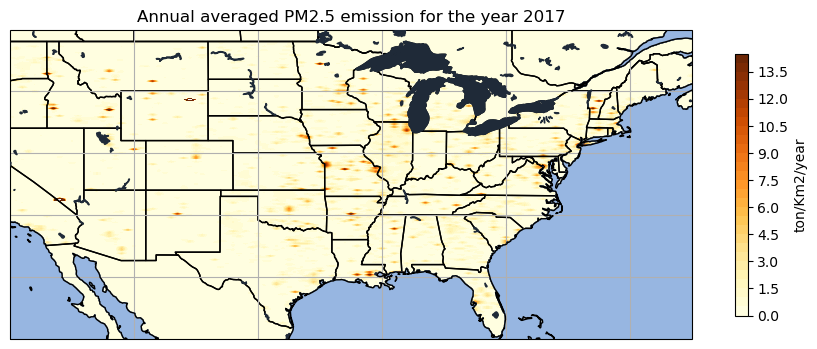

In [21]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())


# Add cyclic point to data
data=dr_out['PM25ANN']
data, lons = add_cyclic_point(data, coord=dr_out['lon'])

# Make a filled contour plot
clevs = np.arange(0,15,0.5)
cs=ax.contourf(lons, dr_out['lat'],data,clevs,
            transform = ccrs.PlateCarree(),cmap ='YlOrBr')

# Mask out continents
ax.add_feature(feature.OCEAN, zorder=2, facecolor=cfeature.COLORS['water'])
ax.add_feature(feature.BORDERS, zorder=2, color='k')
ax.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
ax.coastlines(zorder=3, color='k')

# Add coastlines
ax.coastlines()
ax.add_feature(cfeature.STATES.with_scale("50m"))
ax.gridlines()

# Define the xticks for longitude
#ax.set_xticks(np.arange(-120,-65,5), crs=ccrs.PlateCarree())
#lon_formatter = cticker.LongitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
#ax.set_yticks(np.arange(25,50,5), crs=ccrs.PlateCarree())
#lat_formatter = cticker.LatitudeFormatter()
#ax.yaxis.set_major_formatter(lat_formatter) 
;
cbar = plt.colorbar(cs,shrink=0.4,orientation='vertical',label='ton/Km2/year')
plt.title('Annual averaged PM2.5 emission for the year 2017')
plt.savefig('d')
;

''

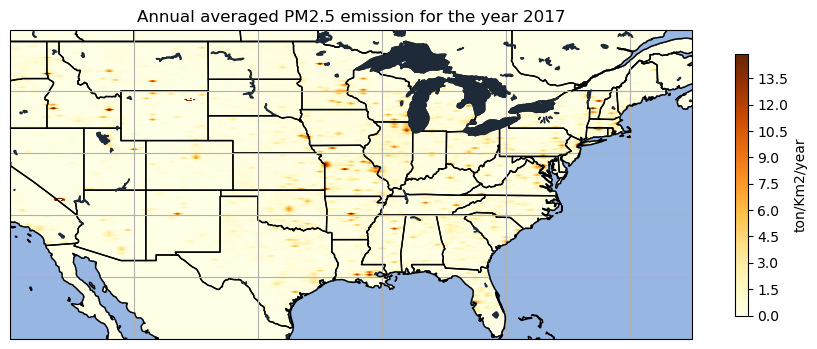

In [22]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())


# Add cyclic point to data
data=dr_out['PM25ANN']
data, lons = add_cyclic_point(data, coord=dr_out['lon'])

# Make a filled contour plot
clevs = np.arange(0,15,0.1)
cs=ax.contourf(lons, dr_out['lat'],data,clevs,
            transform = ccrs.PlateCarree(),cmap ='YlOrBr')

# Mask out continents
ax.add_feature(feature.OCEAN, zorder=2, facecolor=cfeature.COLORS['water'])
ax.add_feature(feature.BORDERS, zorder=2, color='k')
ax.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
ax.coastlines(zorder=3, color='k')

# Add coastlines
ax.coastlines()
ax.add_feature(cfeature.STATES.with_scale("50m"))
ax.gridlines()

# Define the xticks for longitude
#ax.set_xticks(np.arange(-120,-65,5), crs=ccrs.PlateCarree())
#lon_formatter = cticker.LongitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
#ax.set_yticks(np.arange(25,50,5), crs=ccrs.PlateCarree())
#lat_formatter = cticker.LatitudeFormatter()
#ax.yaxis.set_major_formatter(lat_formatter) 
;
cbar = plt.colorbar(cs,shrink=0.4,orientation='vertical',label='ton/Km2/year')
plt.title('Annual averaged PM2.5 emission for the year 2017')
plt.savefig('d1')
;